We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-13 14:12:11--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.78, 13.227.223.117, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', na_filter=False)
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386,Asia
1,2020-05-12,12,5,2020,285,2,Afghanistan,AF,AFG,37172386,Asia
2,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386,Asia
3,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386,Asia
4,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386,Asia
5,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386,Asia
6,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386,Asia
7,2020-05-06,6,5,2020,330,5,Afghanistan,AF,AFG,37172386,Asia
8,2020-05-05,5,5,2020,190,5,Afghanistan,AF,AFG,37172386,Asia
9,2020-05-04,4,5,2020,235,13,Afghanistan,AF,AFG,37172386,Asia


To make room in the dataframe for future predictions, we add columns for those values and set them to missing for now.

In [4]:
df['pcases']  = np.nan
df['pdeaths'] = np.nan

Last check of our source dataframe.

In [5]:
df.count()

dateRep                    16741
day                        16741
month                      16741
year                       16741
cases                      16741
deaths                     16741
countriesAndTerritories    16741
geoId                      16741
countryterritoryCode       16741
popData2018                16741
continentExp               16741
pcases                         0
pdeaths                        0
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths', 'pcases', 'pdeaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-09   0.0  553.0  215.0  0.0  0.0   8.0  145.0  7.0  240.0  62.0  ...   
2020-05-10   2.0  624.0  255.0  0.0  0.0   6.0  146.0  0.0  165.0  42.0  ...   
2020-05-11   1.0  781.0  369.0  0.0  0.0  12.0  138.0  2.0   13.0  10.0  ...   
2020-05-12   1.0  680.0  285.0  0.0  0.0   4.0   79.0  0.0  245.0  87.0  ...   
2020-05-13   2.0  783.0  280.0  0.0  0.0   4.0  146.0  0.0  529.0  36.0  ...   

           pdeaths                                      
geoId           VC  VE  VG  VI  VN  XK  YE  ZA  ZM  ZW  
dateRep                                                 
2019-12-31     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-01     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-02     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-03     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-01-04     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2020-05-09     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-10     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-11     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-12     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2020-05-13     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[135 rows x 836 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('183 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... pdeaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...      VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...     NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...     ...  ..  ..   
2020-11-08   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-09   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-10   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-11   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   
2020-11-12   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...     NaN NaN NaN   

                                        
geoId       VI  VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-11-08 NaN NaN NaN NaN NaN NaN NaN  
2020-11-09 NaN NaN NaN NaN NaN NaN NaN  
2020-11-10 NaN NaN NaN NaN NaN NaN NaN  
2020-11-11 NaN NaN NaN NaN NaN NaN NaN  
2020-11-12 NaN NaN NaN NaN NaN NaN NaN  

[318 rows x 836 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [8]:
df_geo['dateRep'] = df_geo.index
df_geo['daynum'] = (df_geo['dateRep'] - pd.Timestamp('2019-01-01')).dt.days.astype('int')
df_geo['daynum'].describe()

count    318.000000
mean     522.500000
std       91.942917
min      364.000000
25%      443.250000
50%      522.500000
75%      601.750000
max      681.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak usually fits a gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. Before fitting we have to find out how far a country has come along the curve. We use the residuals of a fit along the double logarithm, which should be a line. Detailed explanation follows below.

In [9]:
country  = 'CH'
measure  = 'cases'
pmeasure = 'pcases'

mincases = df[df['geoId'] == country]['popData2018'].iloc[0] / 1e6
# mincases = 10

def calcresd(progress):
    df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
    maxy = df_pred['y'].cumsum().max()
    df_pred = df_pred[df_pred['y'] > mincases]
    df_pred['y'] = df_pred['y'].cumsum() / maxy * progress
    df_pred = df_pred[df_pred['y'] > 0]
    df_pred['y'] = - np.log(df_pred['y'])
    df_pred = df_pred[df_pred['y'] > 0]
    if len(df_pred) > 4:
        df_pred['y'] = np.log(df_pred['y'])
        fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=1, full=True)
        print('Progress', progress[0], 'gives', fit[1][0])
        return(fit[1][0])
    else:
        return 100
    
from scipy.optimize import minimize

res = minimize(calcresd, 1, method='SLSQP', bounds=[(0.1, 1)])


Progress 1.0 gives 7.346302264132461
Progress 1.0 gives 7.346302264132461
Progress 1.0000000149011612 gives 7.346364388558346
Progress 0.09999999999999998 gives 2.256110257593087
Progress 0.5493887041407739 gives 5.1075818276945455
Progress 0.7744255420608275 gives 5.613491353655054
Progress 0.887004571450244 gives 4.552706840622803
Progress 0.9431652512664714 gives 2.7080867844323855
Progress 0.9710152585553385 gives 1.0389817114657443
Progress 0.9847095355946968 gives 0.22122071916656524
Progress 0.9847095355946968 gives 0.22122071916656524
Progress 0.984709550495858 gives 0.22122021305321662
Progress 0.9848330968515033 gives 0.217088079016088
Progress 0.9848330968515033 gives 0.217088079016088
Progress 0.9848331117526645 gives 0.2170875884289177
Progress 0.9854319505223392 gives 0.19897224840731775
Progress 0.9854319505223392 gives 0.19897224840731775
Progress 0.9854319654235004 gives 0.19897183919929487
Progress 0.9879295262996193 gives 0.16706666235051348
Progress 0.98792952629961

In [10]:
print(res)

     fun: 0.16634587868759107
     jac: array([-0.04166421])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.9876282])


Now that we now the progress, let's fit step by step. We create the prediction dataframe containing cases above the minimum per day, as set above. Then we create the cumulative sum with `cumsum` that should approach the gumbel cumulative density function. We need to normalize the output and scale by the progress number found in the optimization above to fit the right part of the distribution.

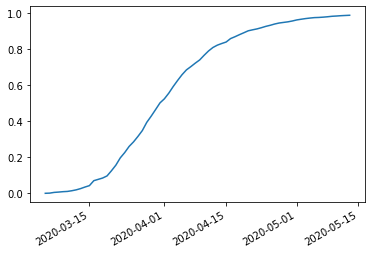

In [11]:
df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country]})
df_pred = df_pred[df_pred['y'] > mincases]
maxy = df_pred['y'].cumsum().max()
df_pred['y'] = df_pred['y'].cumsum() / maxy * res.x[0]
df_pred['y'].plot()

We select the remaining cases above zero, as we have to take the first logarithm.

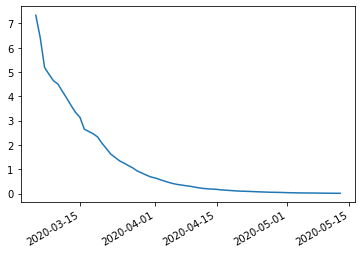

In [12]:
df_pred = df_pred[df_pred['y'] > 0]
df_pred['y'] = - np.log(df_pred['y'])
df_pred['y'].plot()

Again we select cases above zero, because we take the second logarithm. If the original data follows the gumbel distribution, we should now approach a straight line.

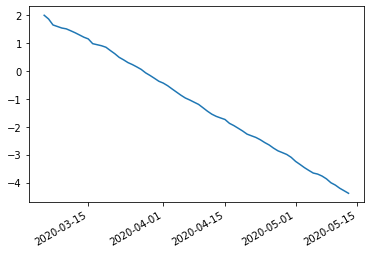

In [13]:
df_pred = df_pred[df_pred['y'] > 0]
df_pred['y'] = np.log(df_pred['y'])
df_pred['y'].plot()

With `polyfit` we check if we can fit a line.

CH factors [-0.0922238  41.57914687] residuals 0.17894664241132463


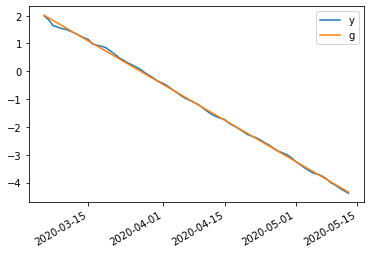

In [14]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=1, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['g'] = np.polyval(fit[0], df_pred['x'])
df_pred[['y', 'g']].plot()

The `polyval` function takes the results of `polyfit` factors and applies them to input data. Once we have the resulting values, we take the double negative exponential to find the estimated cumulative curve. To reduce that to the orignal curve we take the difference betweeen subsequent values with `shift`.

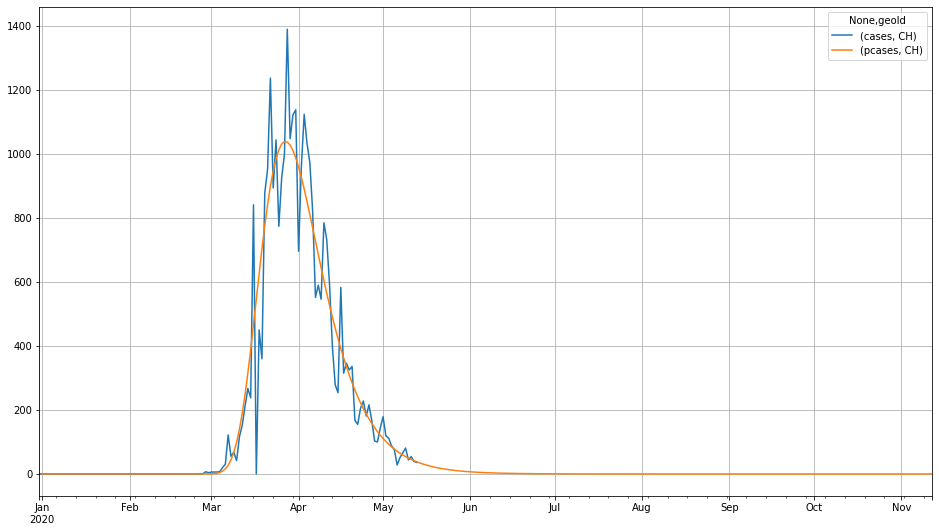

In [15]:
df_geo[(pmeasure, country)] = np.exp(- np.exp(np.polyval(fit[0], df_geo['daynum']))) * maxy / res.x[0]
df_geo[(pmeasure, country)] = df_geo[(pmeasure, country)] - df_geo[(pmeasure, country)].shift()
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

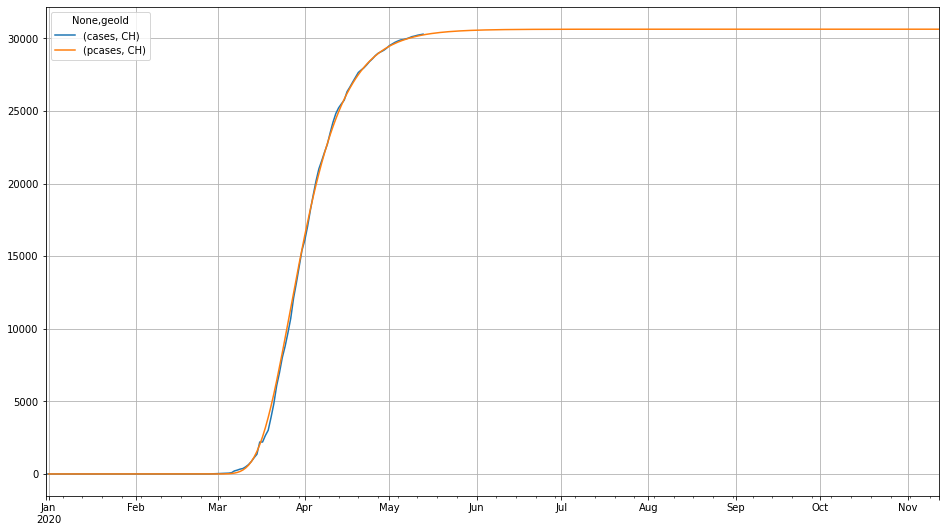

In [16]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

In [17]:
df_geo[pmeasure][country].cumsum().tail(1).astype(int)

2020-11-12    30639
Freq: D, Name: CH, dtype: int64

Keep exploring! Stay home, wash your hands, keep your distance.